[Streaming Data to Bigtable](https://www.cloudskillsboost.google/focuses/58499?catalog_rank=%7B%22rank%22%3A3%2C%22num_filters%22%3A0%2C%22has_search%22%3Atrue%7D&parent=catalog&search_id=23823943)

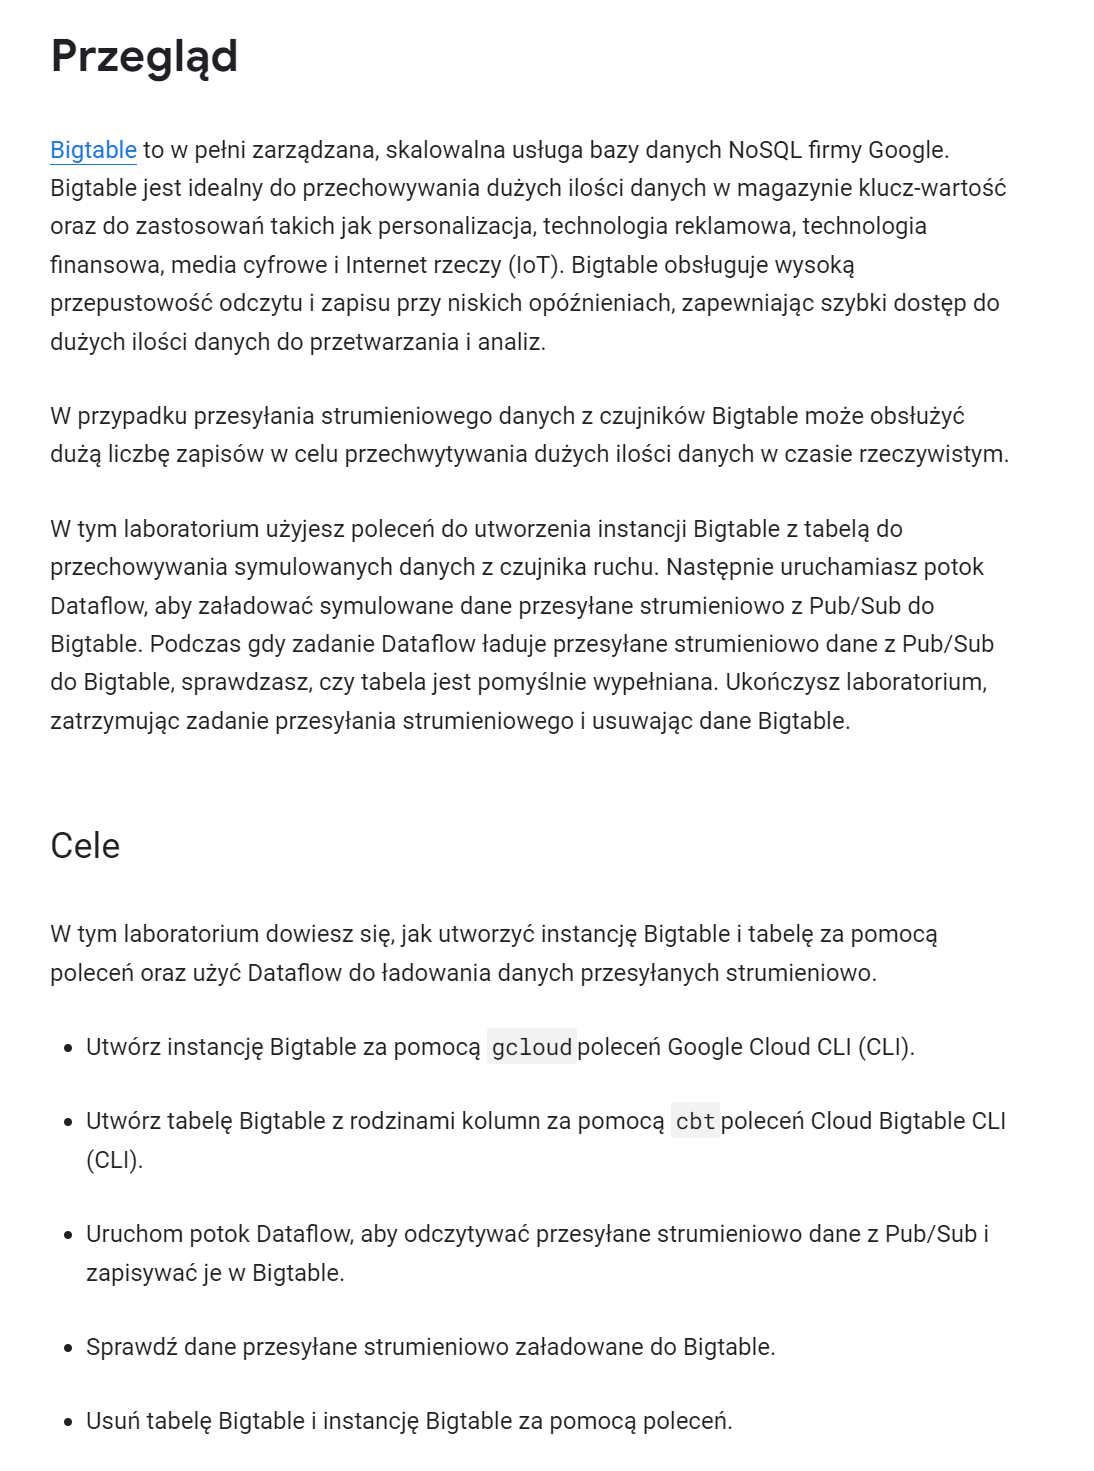

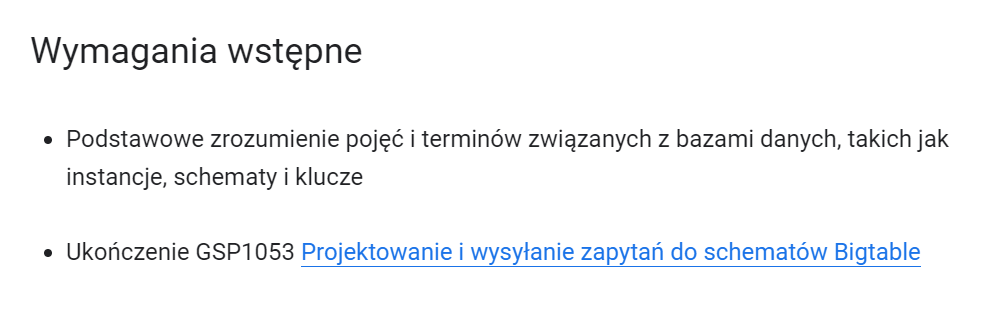

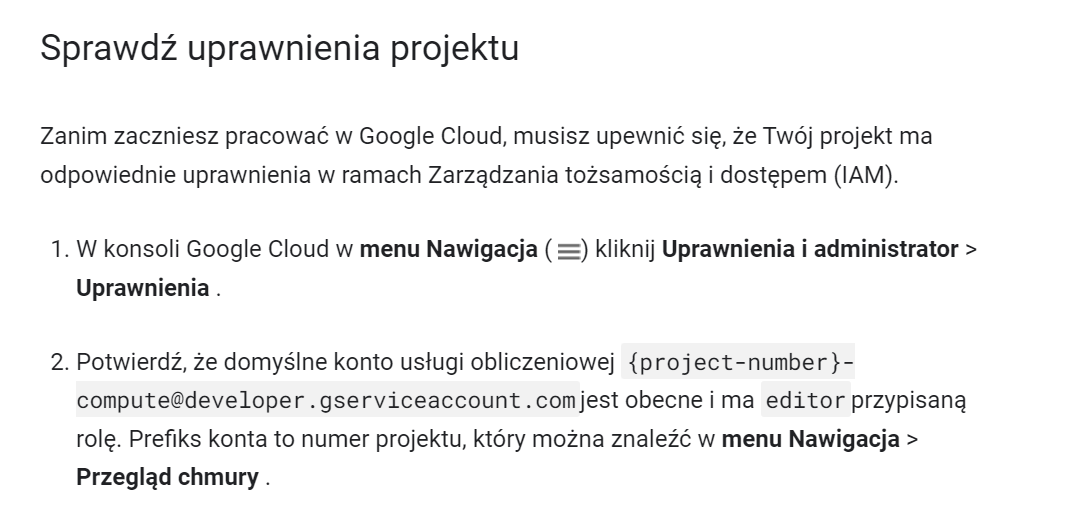

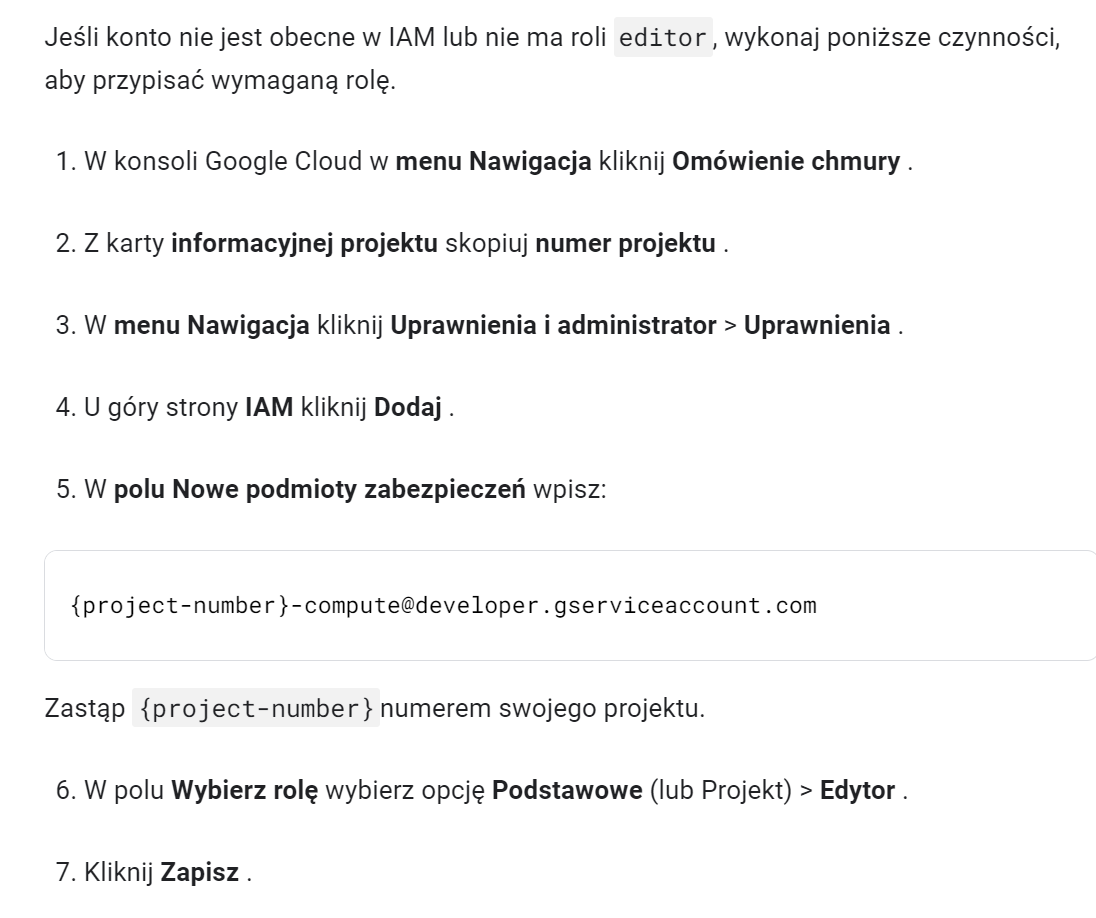

In [ ]:
{project-number}-compute@developer.gserviceaccount.com

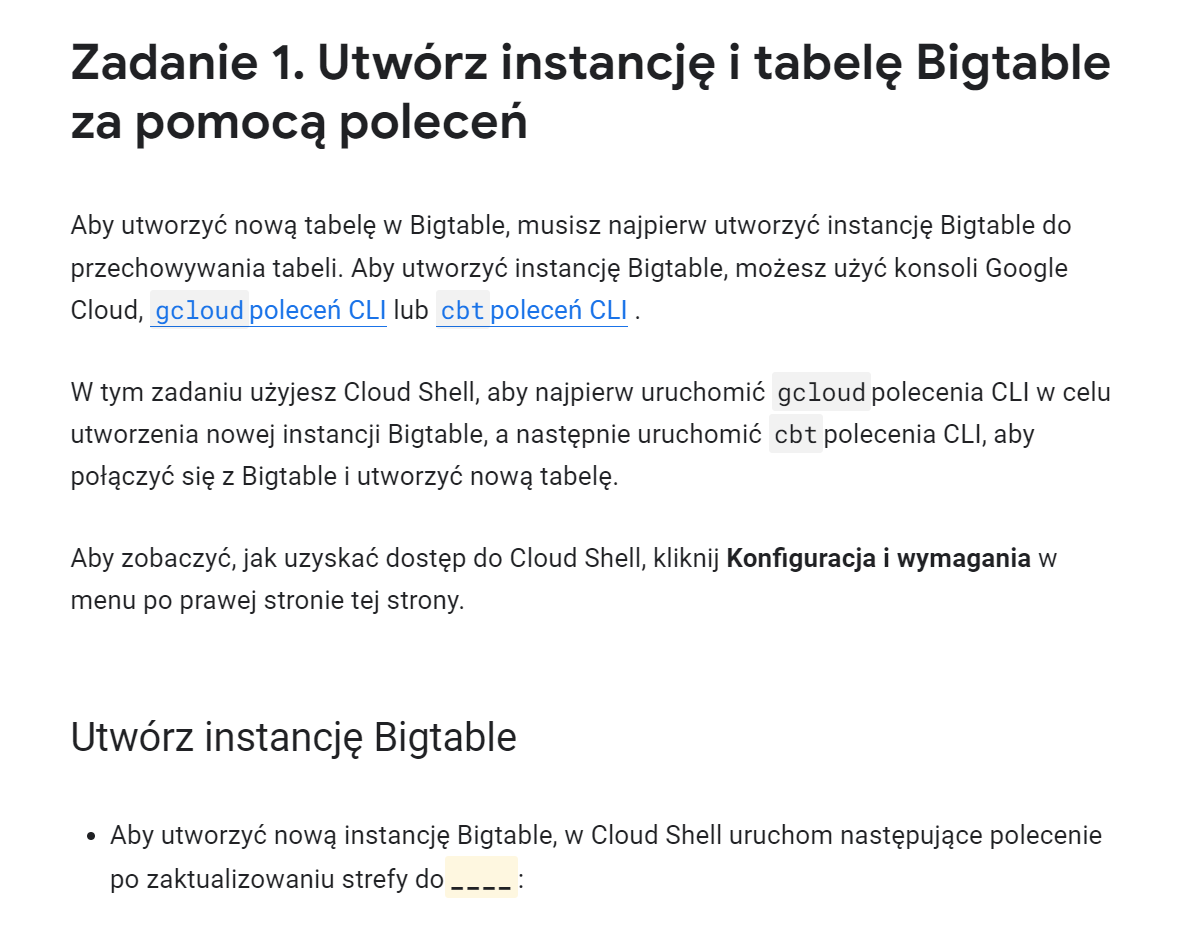

In [ ]:
# https://cloud.google.com/bigtable/docs/creating-instance#gcloud

# https://cloud.google.com/bigtable/docs/creating-instance#cbt

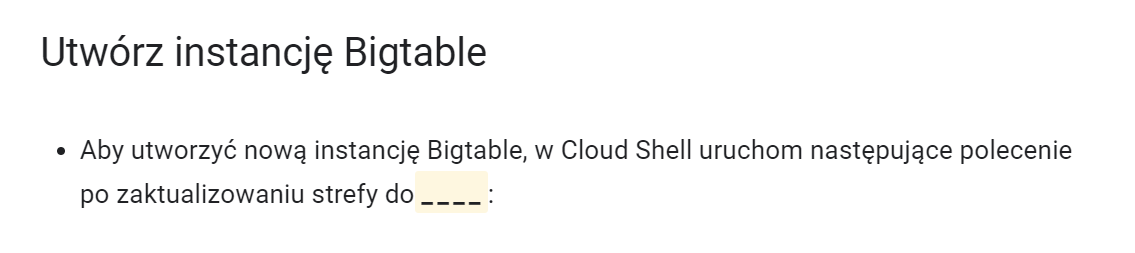

In [ ]:
# c1

In [ ]:
gcloud bigtable instances create sandiego \
--display-name="San Diego Traffic Sensors" \
--cluster-storage-type=SSD \
--cluster-config=id=sandiego-traffic-sensors-c1,zone=zone,nodes=1

In [ ]:
gcloud bigtable instances create sandiego \
--display-name="San Diego Traffic Sensors" \
--cluster-storage-type=SSD \
--cluster-config=id=sandiego-traffic-sensors-c1,zone=us-central1-c,nodes=1

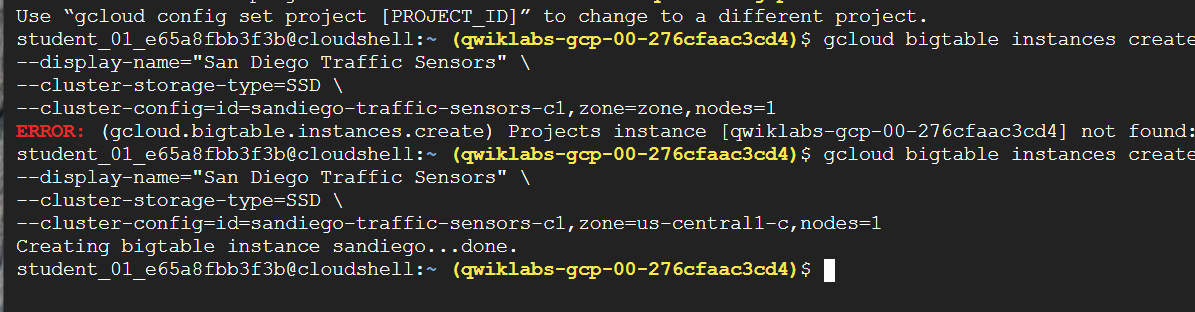

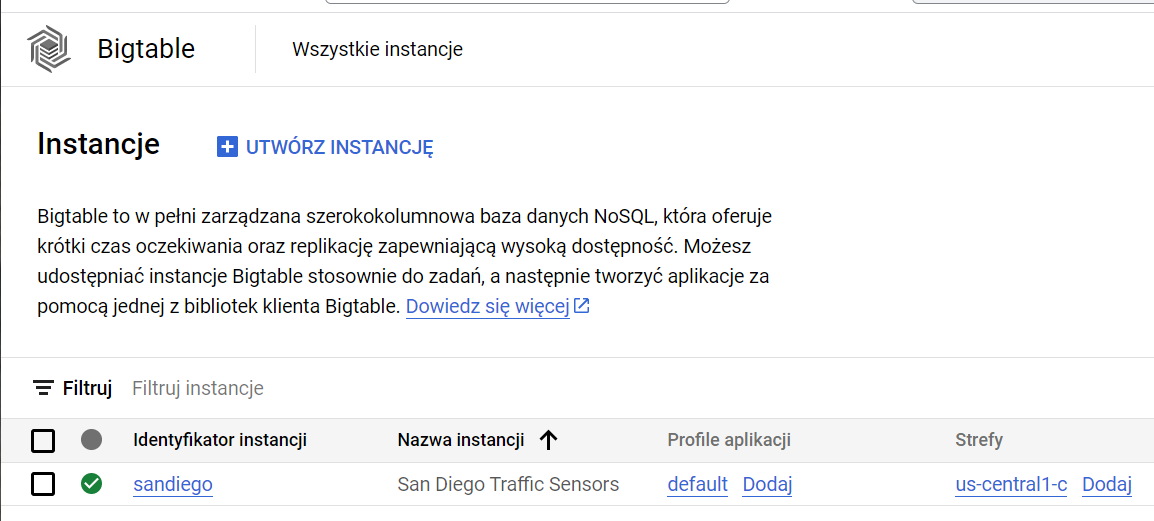

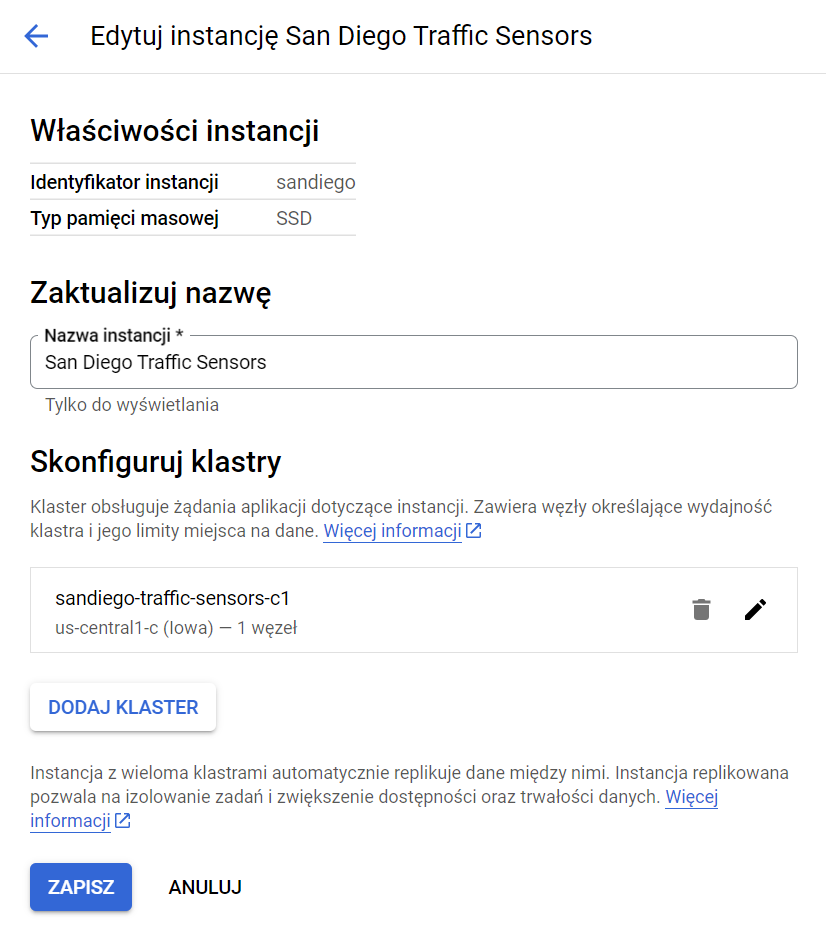

W kontekście Bigtable, terminy "klaster" i "węzeł" mają różne znaczenia.

Klaster w Bigtable odnosi się do zespołu węzłów, które razem tworzą infrastrukturę i środowisko wykonawcze dla usługi Bigtable. Klaster składa się z wielu węzłów, które współpracują w celu obsługi i przetwarzania danych.

Węzeł (node) w Bigtable odnosi się do jednostki obliczeniowej, która jest częścią klastera Bigtable. Każdy węzeł w klastrze jest odpowiedzialny za przechowywanie danych, obsługę zapytań i wykonywanie operacji na danych. Węzły w klastrze Bigtable są odpowiedzialne za rozproszone przechowywanie danych i zapewnienie wydajności i skalowalności.

Węzły są jednostkami, które ostatecznie przechowują i przetwarzają dane w Bigtable, podczas gdy klaster obejmuje wszystkie węzły i dostarcza infrastrukturę i funkcjonalność potrzebną do działania usługi Bigtable.

Warto zauważyć, że terminologia może się różnić w zależności od kontekstu i systemu. W przypadku Bigtable, klaster i węzeł mają opisane wyżej znaczenia.

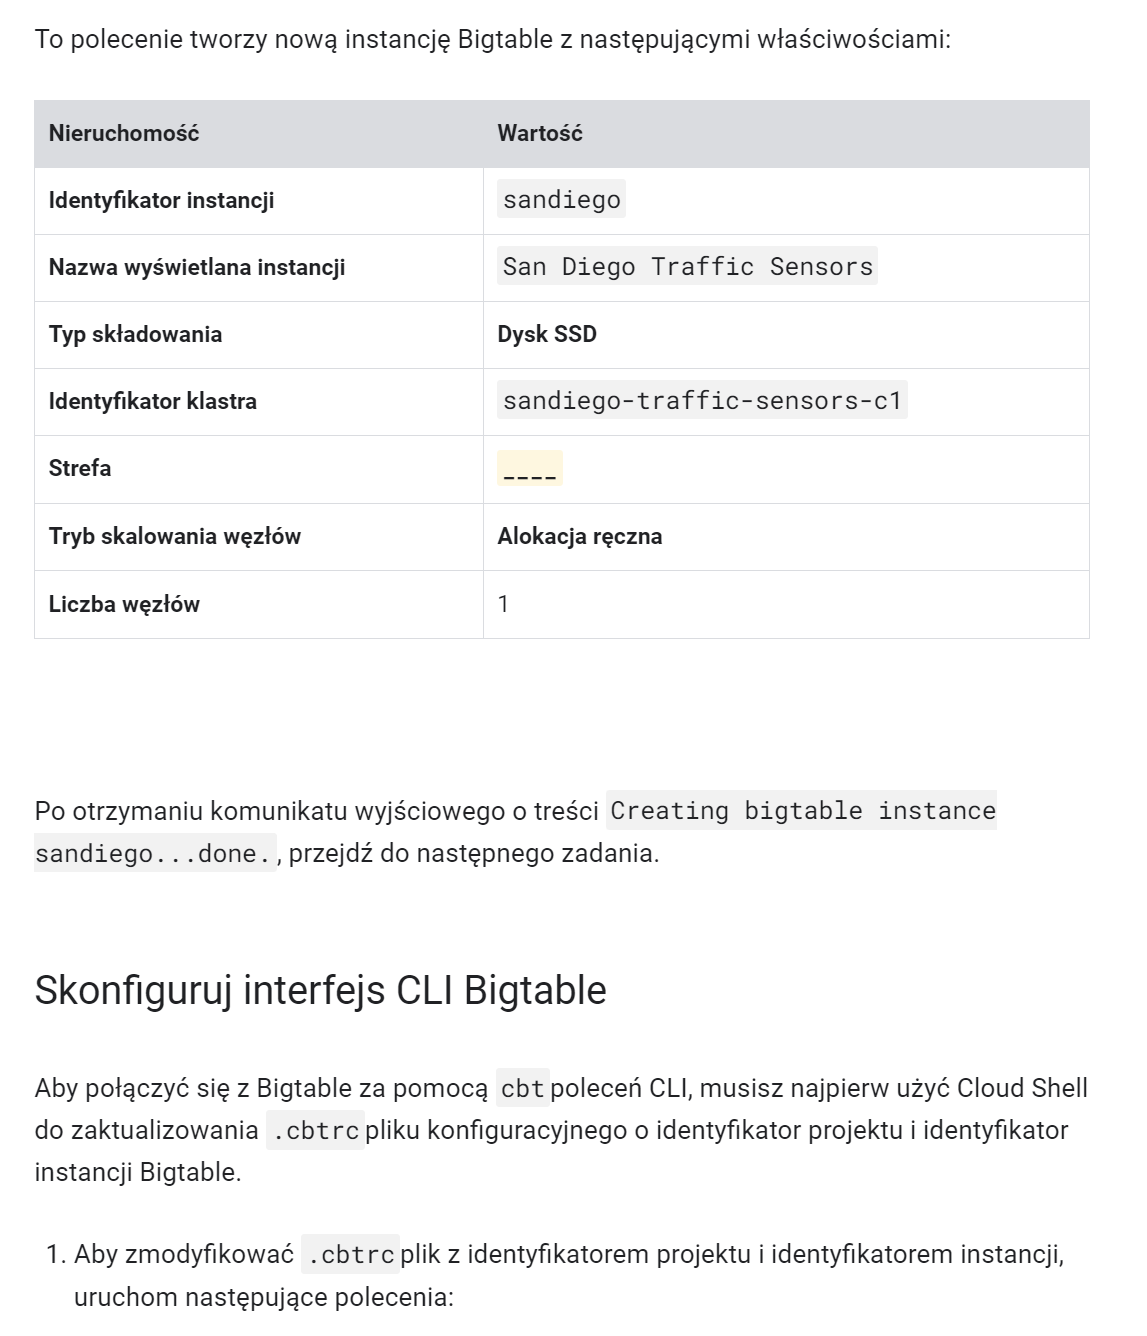

In [ ]:
echo project = `gcloud config get-value project` \
    >> ~/.cbtrc

In [ ]:
echo instance = sandiego \
    >> ~/.cbtrc

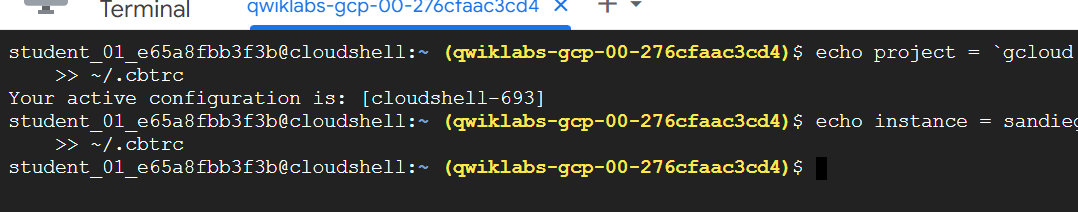

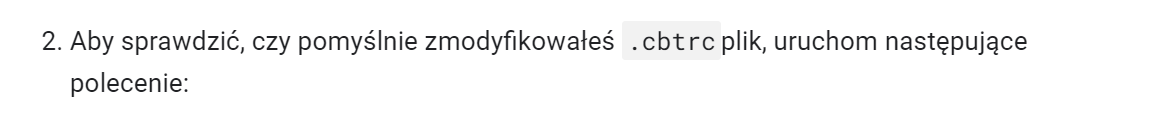

In [ ]:
cat ~/.cbtrc

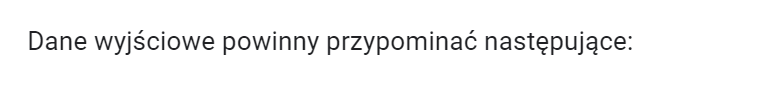

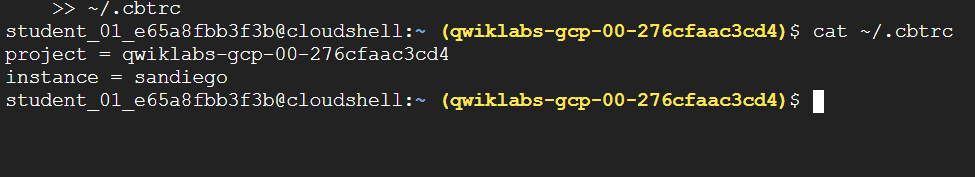

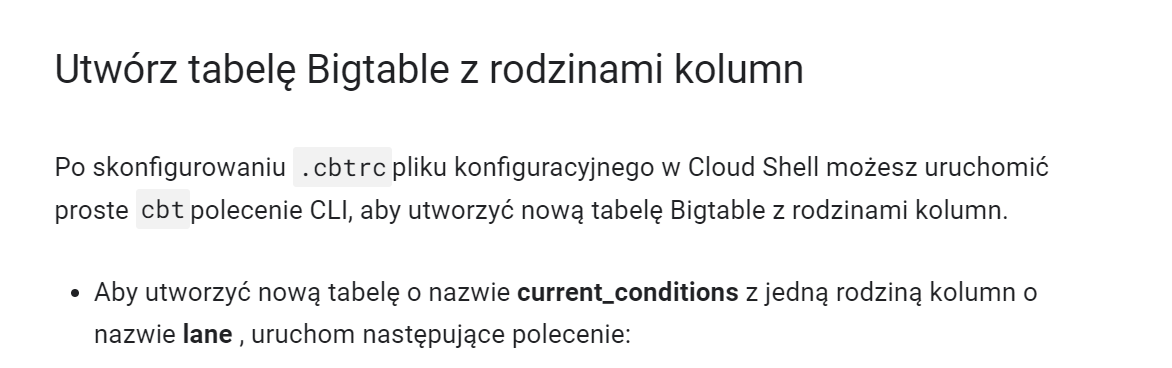

In [ ]:
cbt createtable current_conditions \
    families="lane"

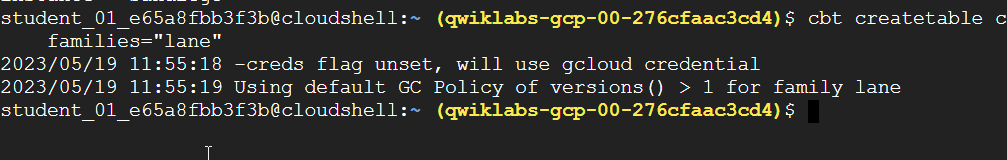

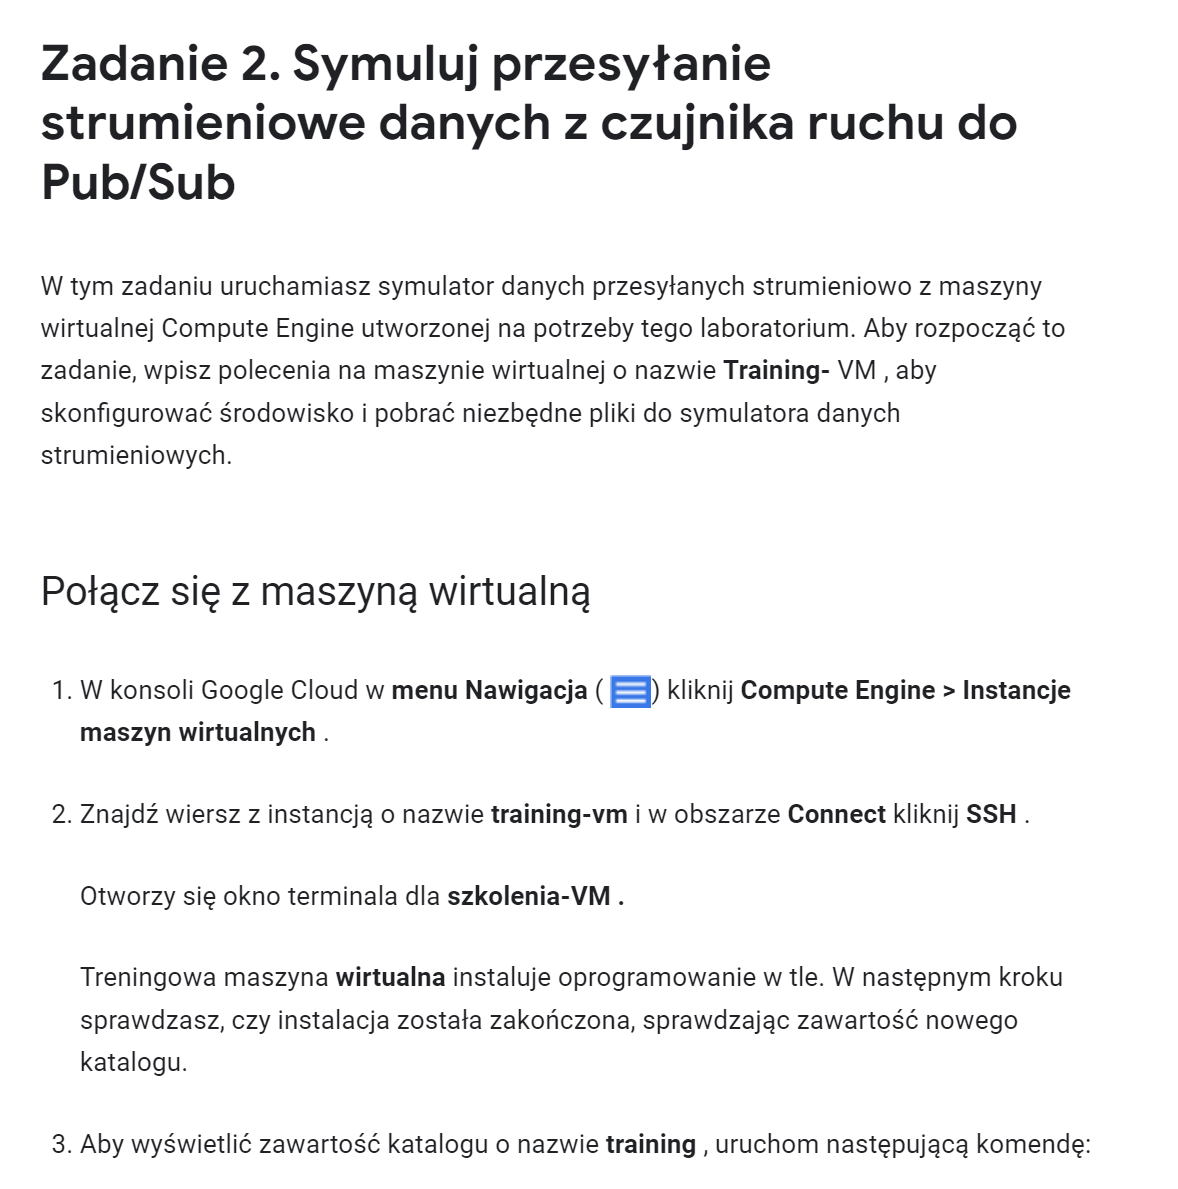

In [ ]:
ls /training

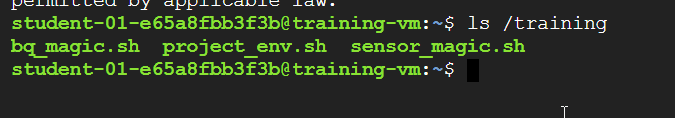

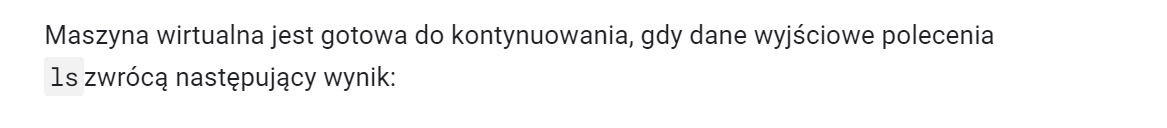

In [ ]:
# cd bq_magic.sh

# cd project_env.sh

# cd sensor_magic.sh

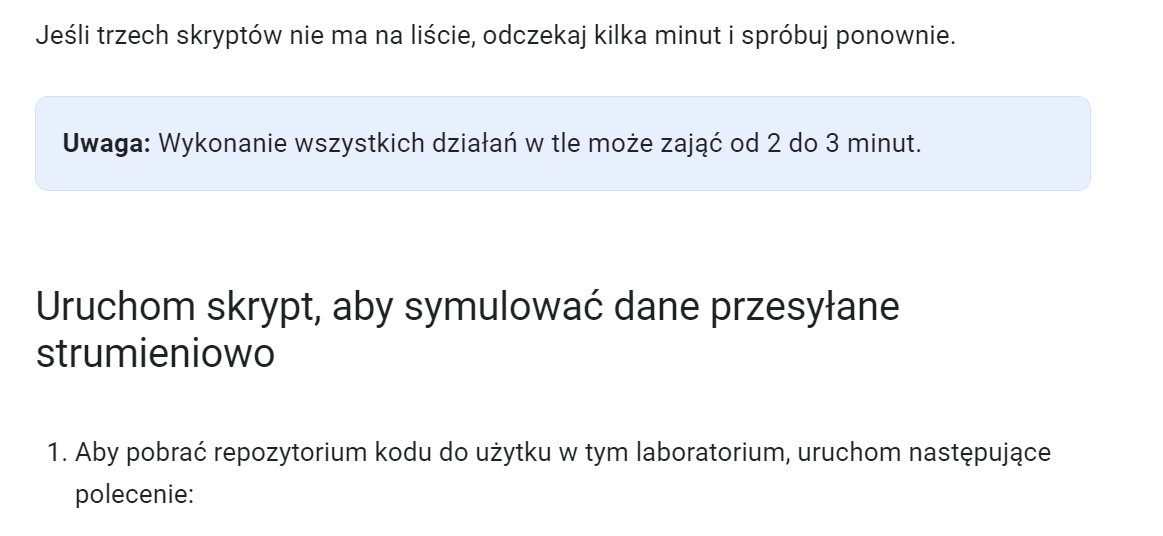

In [ ]:
git clone https://github.com/GoogleCloudPlatform/training-data-analyst

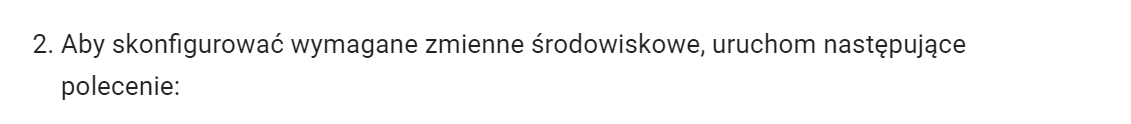

In [ ]:
# cd project_env.sh

In [ ]:
#! /bin/bash

# Create the DEVSHELL_PROJECT_ID on a VM
curl "http://metadata.google.internal/computeMetadata/v1/project/project-id" -H "Metadata-Flavor: Google" > Project_ID
awk '{print "export DEVSHELL_PROJECT_ID=" $0, "\n" "export BUCKET=" $0, "\n" "export JAVA_HOME=/usr/lib/jvm/java-8-openjdk-amd64/jre" }' Project_ID > env.txt
source env.txt
echo $DEVSHELL_PROJECT_ID

In [ ]:
source /training/project_env.sh

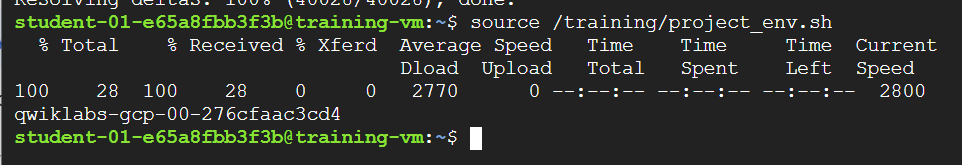

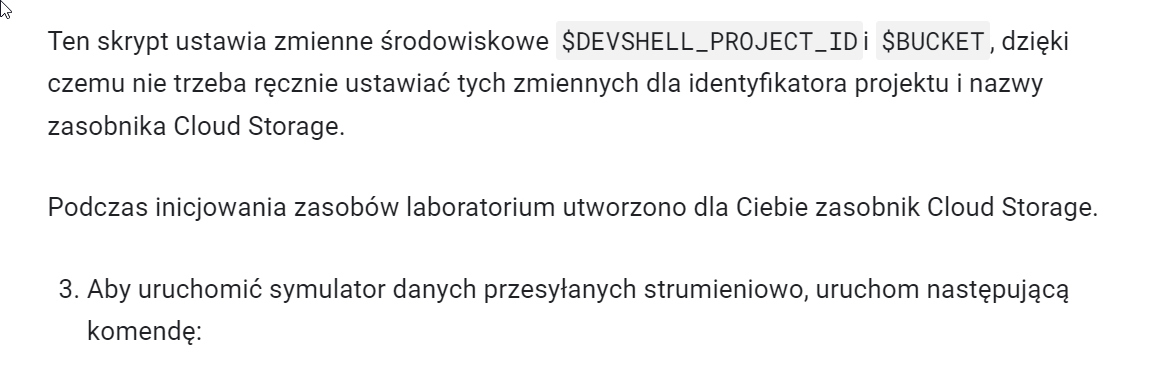

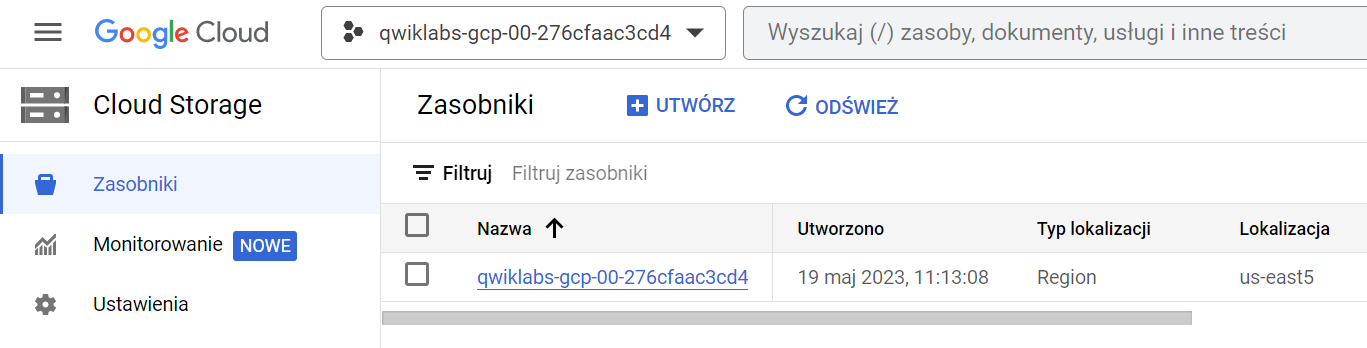

In [ ]:
# cd sensor_magic.sh

In [ ]:
/training/sensor_magic.sh

In [ ]:
#! /bin/bash

# User tasks:
#  1. copy repo to ~/training-data-analyst
#  2. create $DEVSHELL_PROJECT_ID
#
# Install PIP
# sudo apt-get install -y python-pip
# Use PIP to install pubsub API
# sudo pip install -U google-cloud-pubsub
# Download the data file
gsutil cp gs://cloud-training-demos/sandiego/sensor_obs2008.csv.gz ~/training-data-analyst/courses/streaming/publish/
# cd to directory
cd ~/training-data-analyst/courses/streaming/publish/
# Run sensor simulator
python ./send_sensor_data.py --speedFactor=60 --project $DEVSHELL_PROJECT_ID

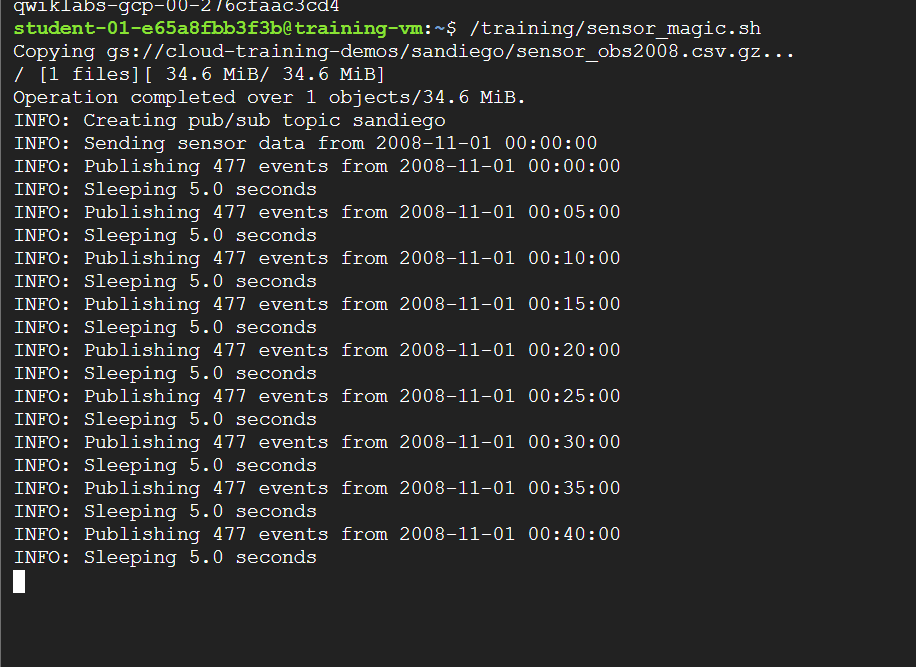

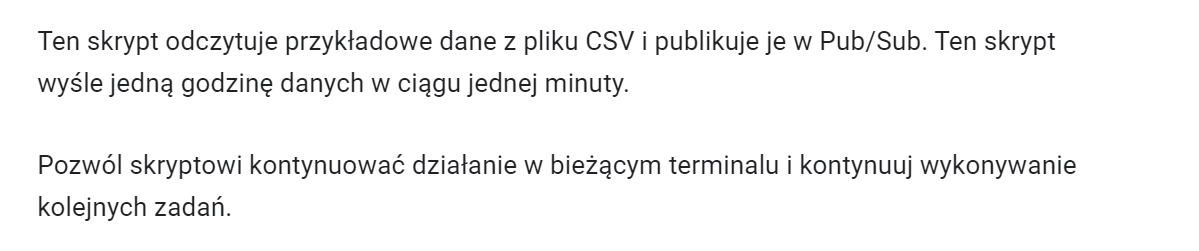

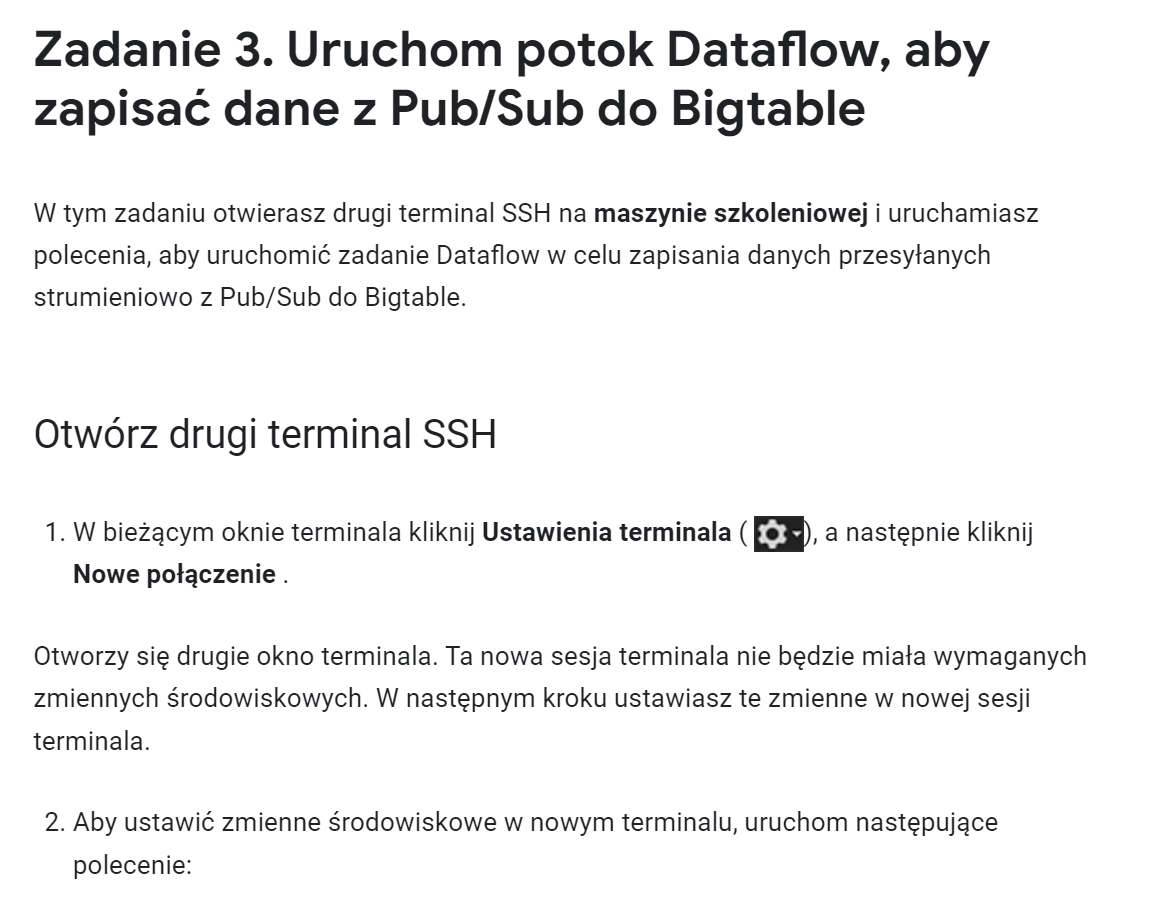

In [ ]:
source /training/project_env.sh

In [ ]:
#! /bin/bash

# Create the DEVSHELL_PROJECT_ID on a VM
curl "http://metadata.google.internal/computeMetadata/v1/project/project-id" -H "Metadata-Flavor: Google" > Project_ID
awk '{print "export DEVSHELL_PROJECT_ID=" $0, "\n" "export BUCKET=" $0, "\n" "export JAVA_HOME=/usr/lib/jvm/java-8-openjdk-amd64/jre" }' Project_ID > env.txt
source env.txt
echo $DEVSHELL_PROJECT_ID

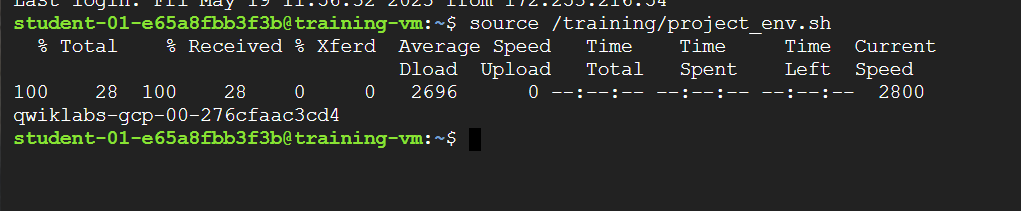

`projects/qwiklabs-gcp-00-276cfaac3cd4/topics/sandiego` nie posiada subskrypcji

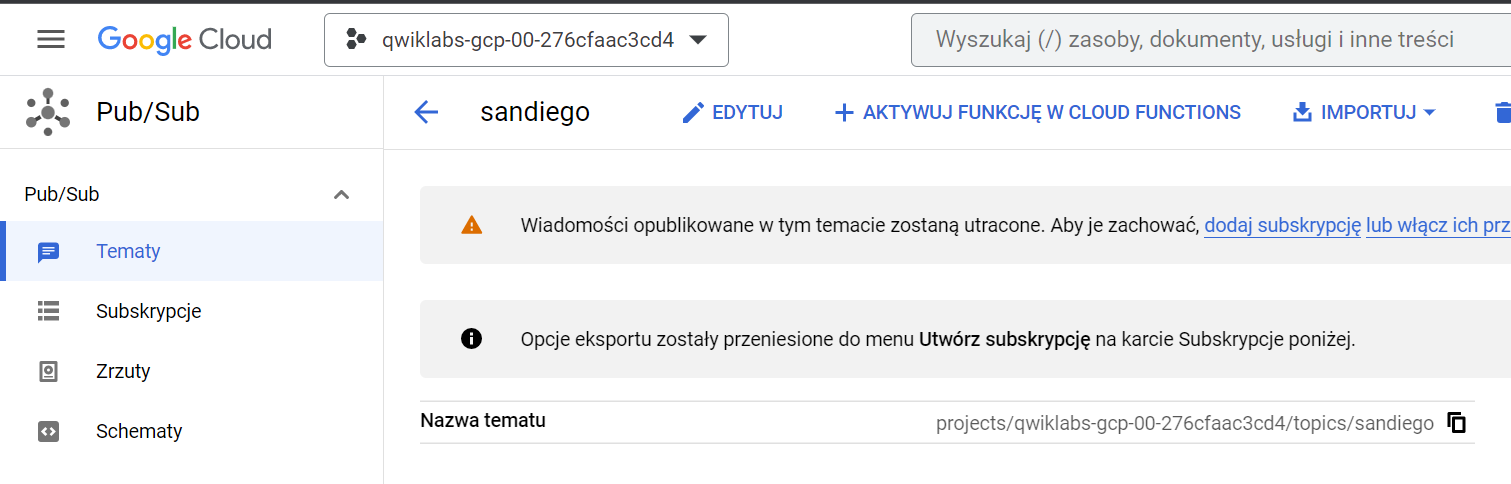

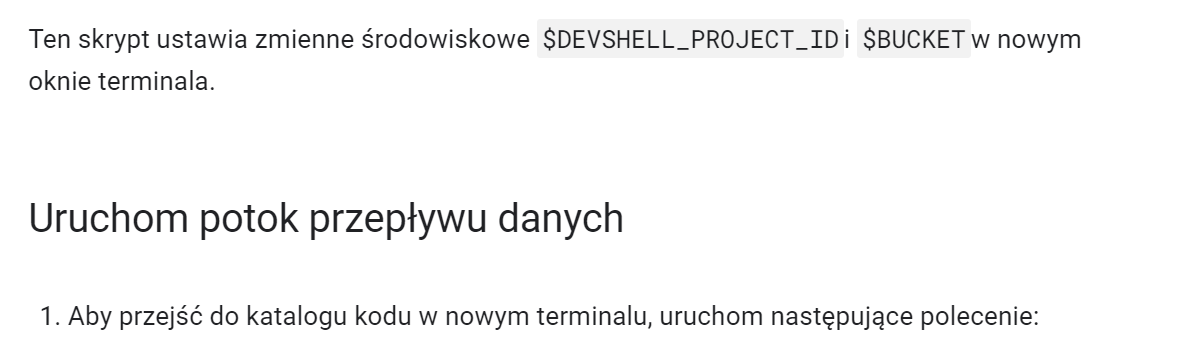

In [ ]:
# https://github.com/GoogleCloudPlatform/training-data-analyst/tree/master/courses/streaming/process/sandiego

In [ ]:
cd ~/training-data-analyst/courses/streaming/process/sandiego

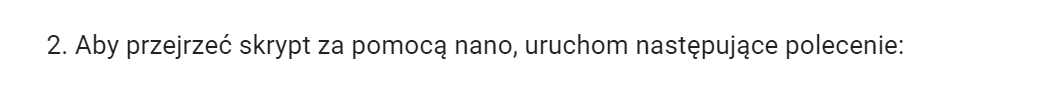

In [ ]:
nano run_oncloud.sh

In [ ]:
#!/bin/bash

if [ "$#" -lt 3 ]; then
   echo "Usage:   ./run_oncloud.sh project-name bucket-name classname [options] "
   echo "Example: ./run_oncloud.sh cloud-training-demos cloud-training-demos CurrentConditions --bigtable"
   exit
fi

PROJECT=$1
shift
BUCKET=$1
shift
MAIN=com.google.cloud.training.dataanalyst.sandiego.$1
shift

echo "Launching $MAIN project=$PROJECT bucket=$BUCKET $*"

export PATH=/usr/lib/jvm/java-8-openjdk-amd64/bin/:$PATH
mvn compile -e exec:java \
 -Dexec.mainClass=$MAIN \
      -Dexec.args="--project=$PROJECT \
      --stagingLocation=gs://$BUCKET/staging/ $* \
      --tempLocation=gs://$BUCKET/staging/ \
      --runner=DataflowRunner"


# If you run into quota problems, add this option the command line above
#     --maxNumWorkers=2
# In this case, you will not be able to view autoscaling, however.

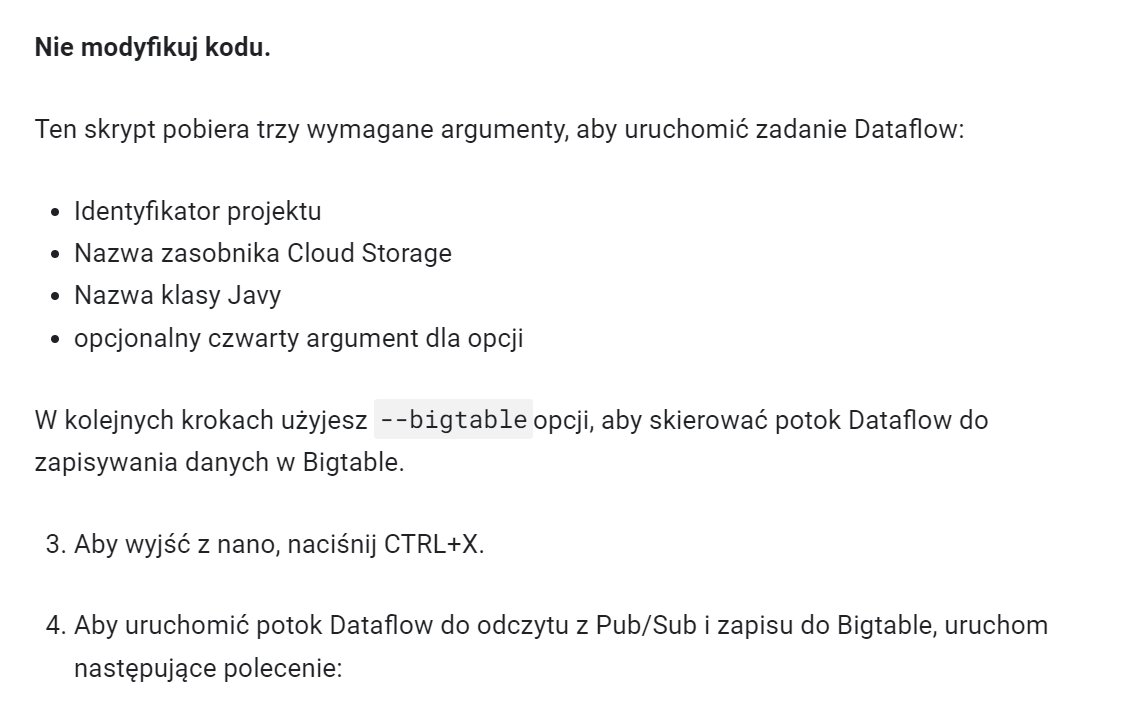

In [ ]:
./run_oncloud.sh $DEVSHELL_PROJECT_ID $BUCKET CurrentConditions --bigtable

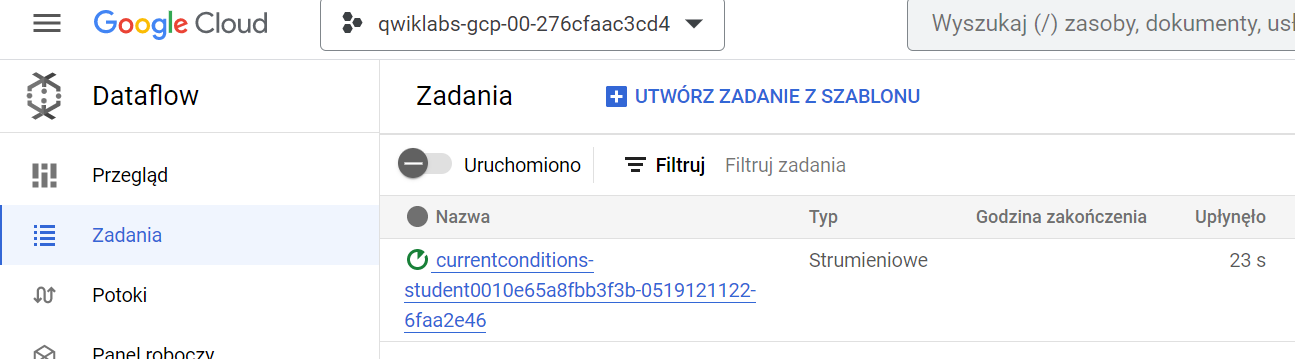

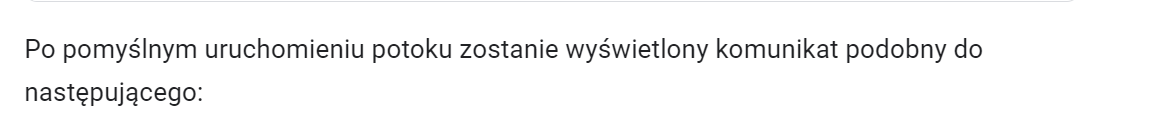

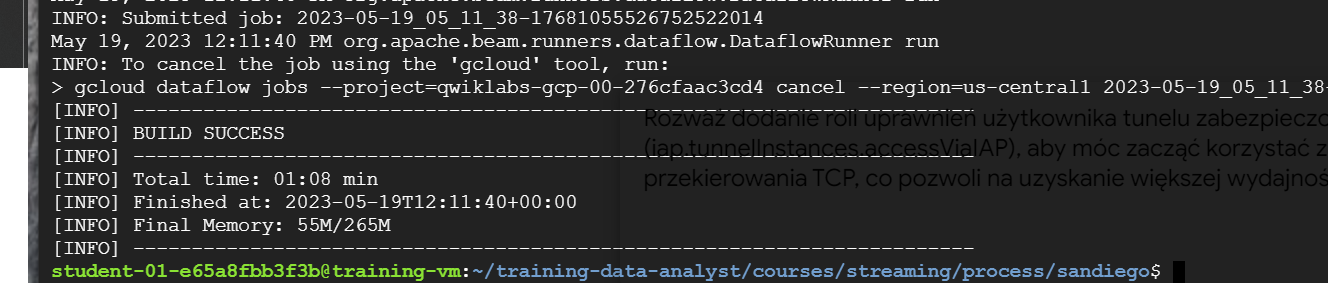

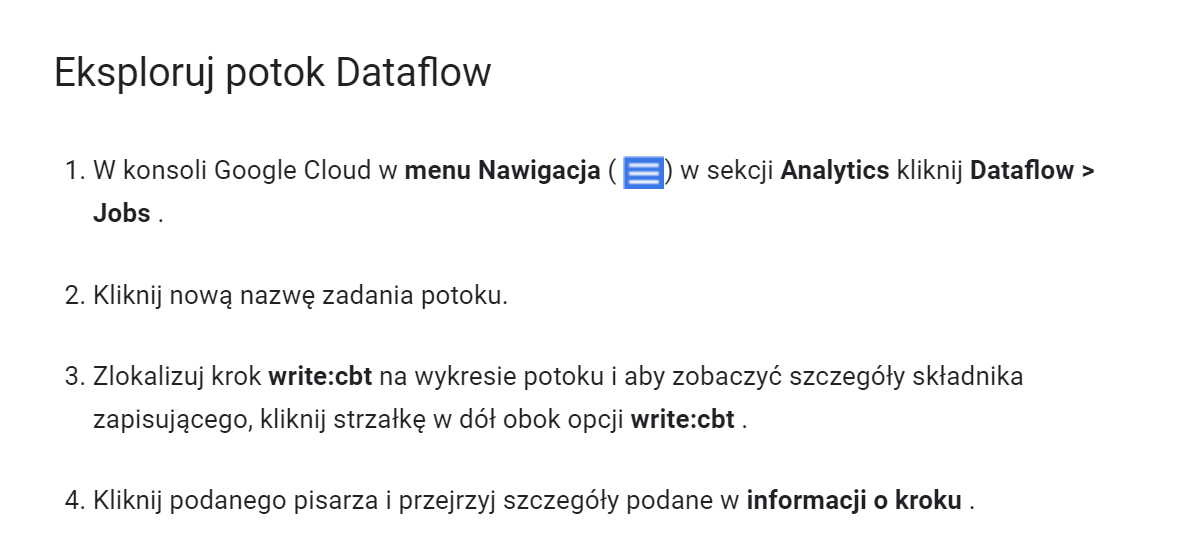

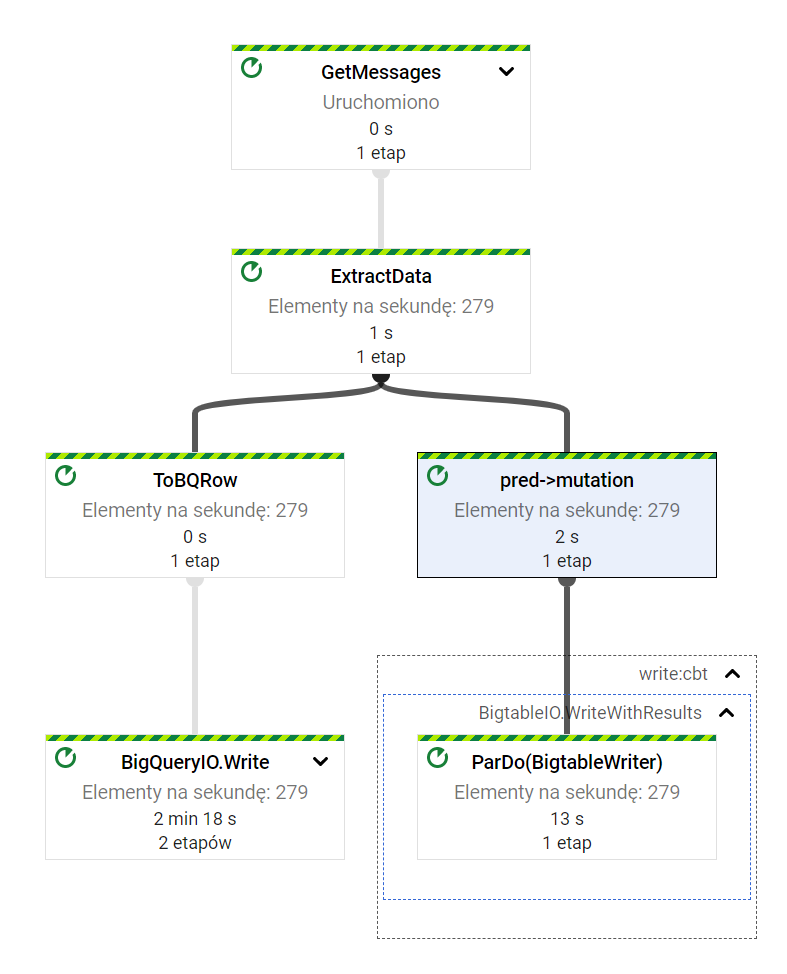

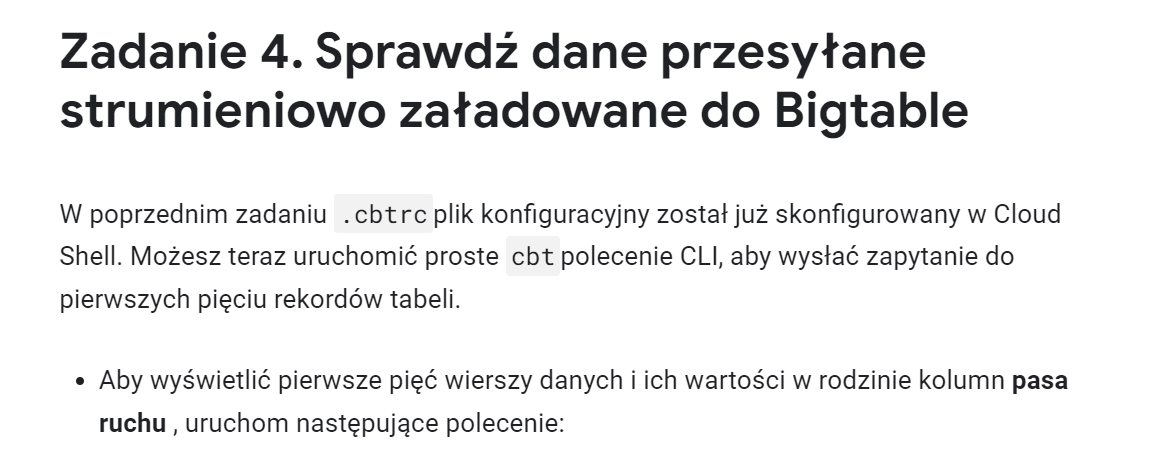

In [ ]:
cbt read current_conditions count=5 \
    columns="lane:.*"

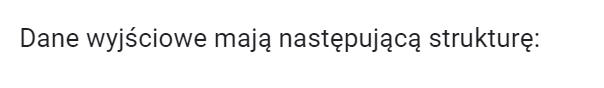

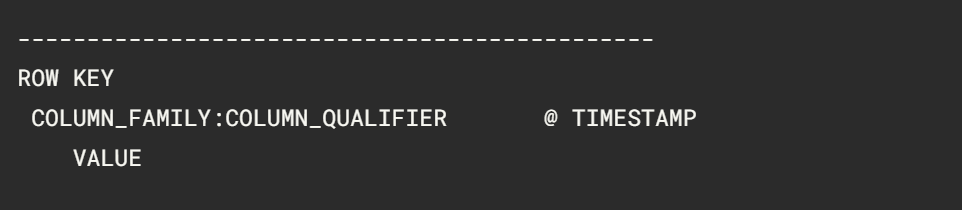

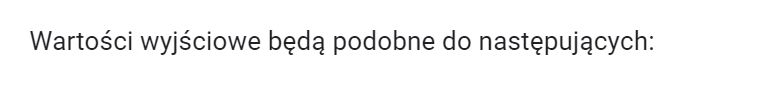

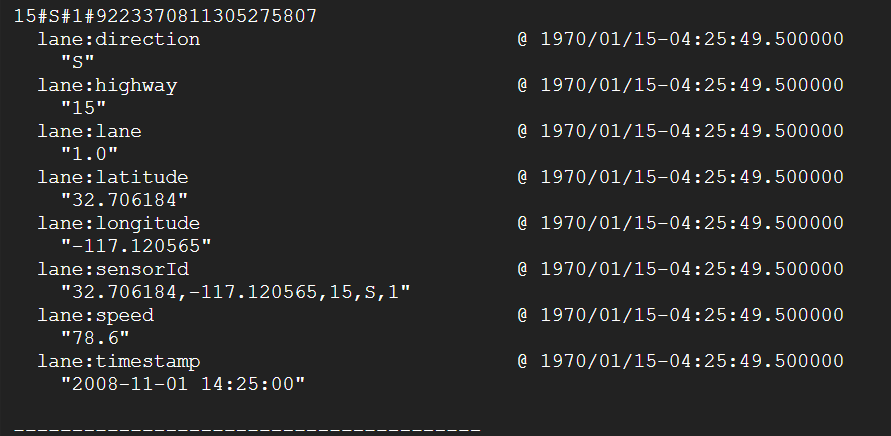

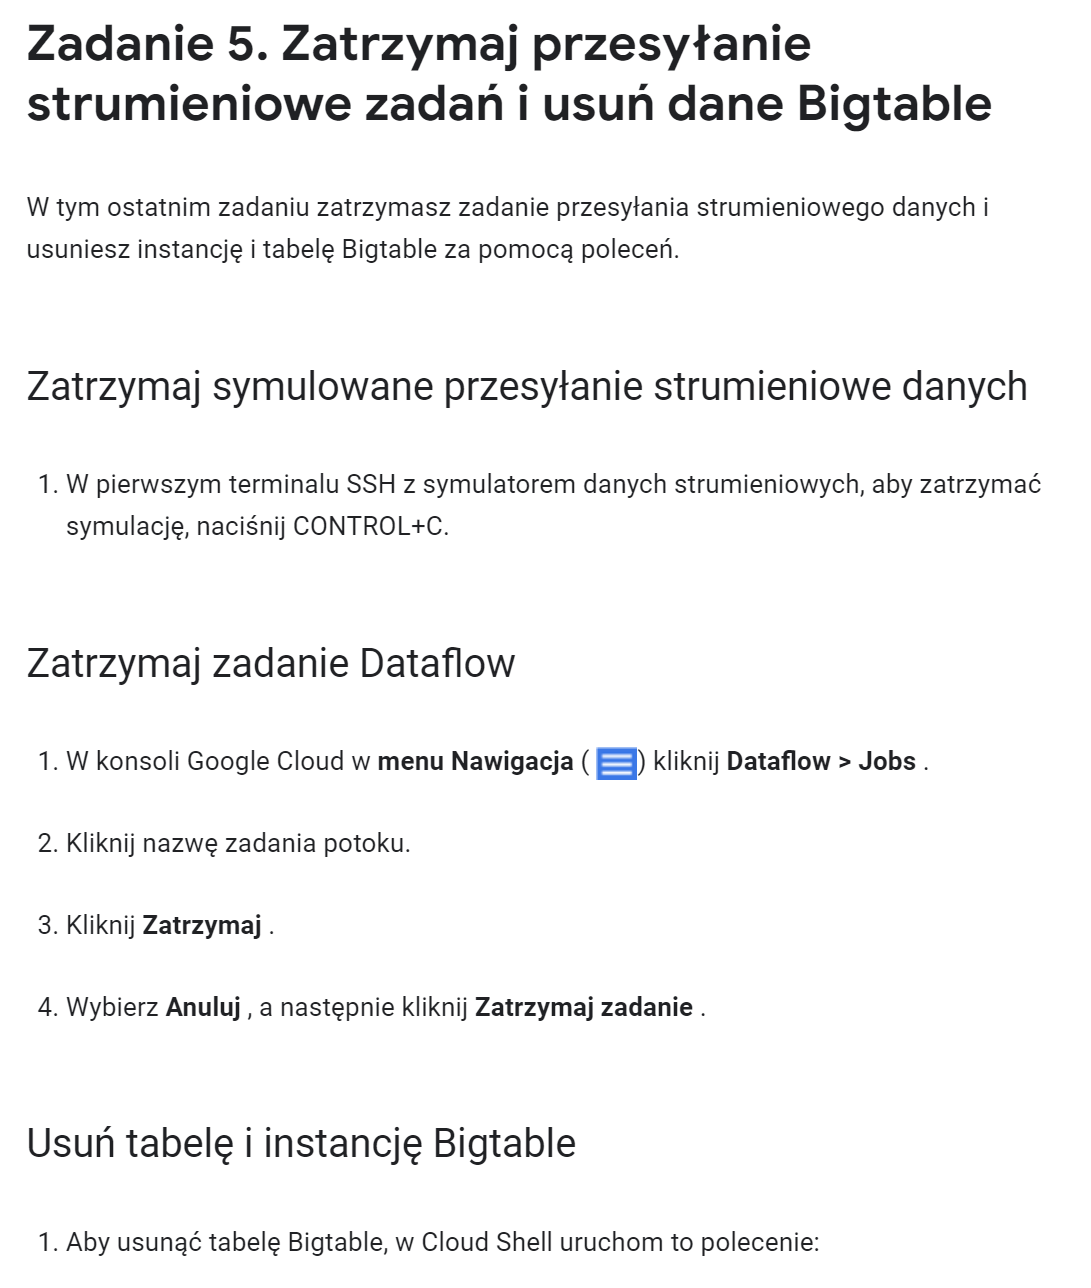

In [ ]:
cbt deletetable current_conditions

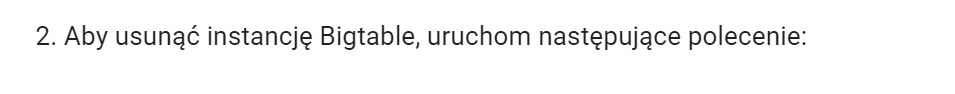

In [ ]:
gcloud bigtable instances delete sandiego

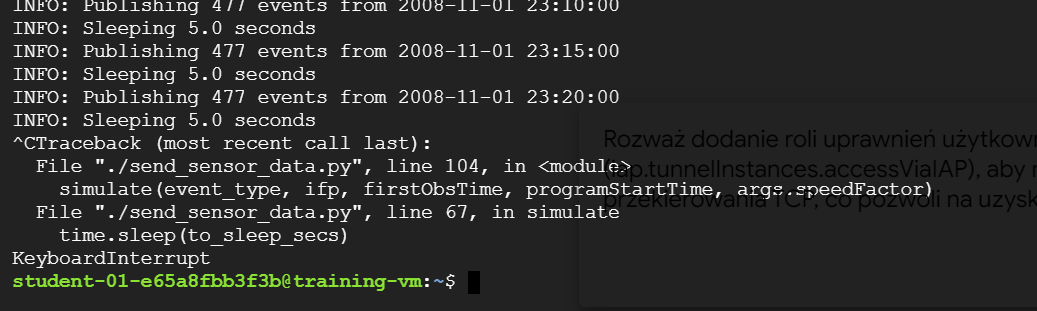

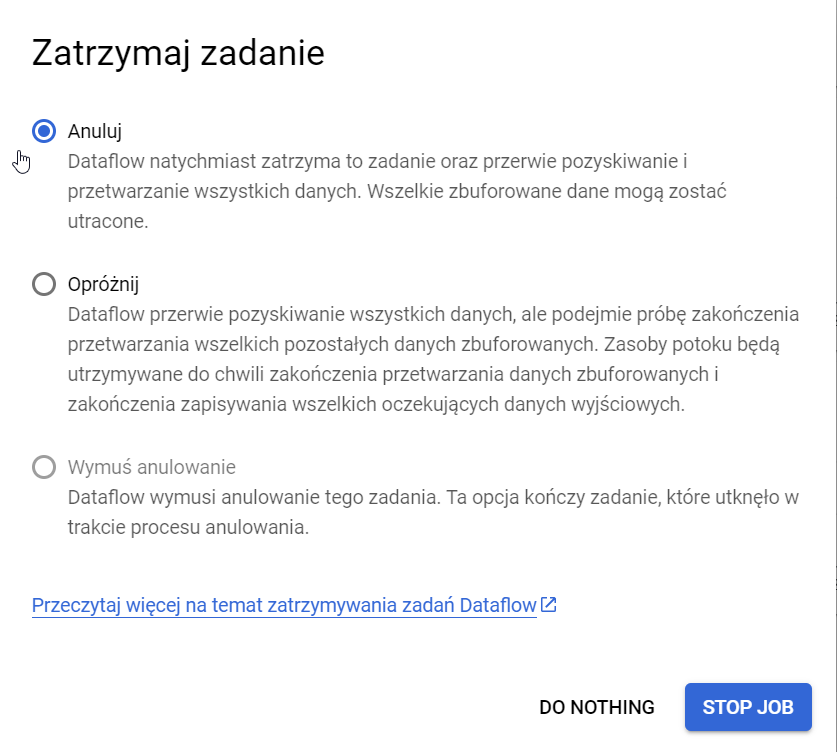

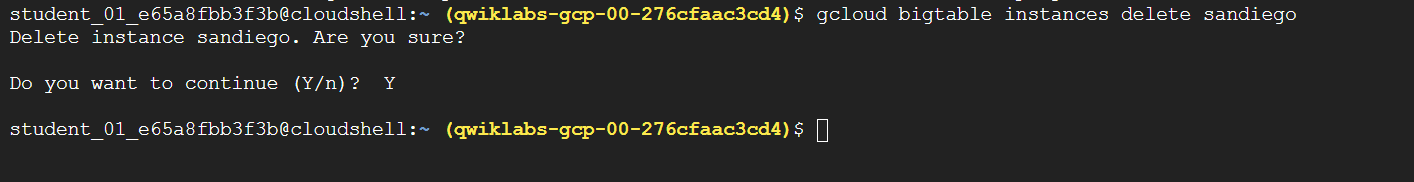